In [4]:
val_annotation_addr = '../input/mammography/yolo_1k/val/labels'
# img_folder = 'yolov5/runs/detect/exp3'
img_folder = 'img_yolo'

output_folder = f'{img_folder}_orig'

In [10]:
import os
import cv2

if not os.path.exists(output_folder):
    os.mkdir(output_folder)

for img_name in os.listdir(img_folder):
    img = cv2.imread(os.path.join(img_folder, img_name))
    img_name = img_name[:-4]
    file_addr = os.path.join(val_annotation_addr, f'{img_name}.txt')
    try:
        with open(file_addr, 'r') as file:
            for line in file.readlines():
                data = list(map(float, line.split()))
                x = int(img.shape[1]*data[1])
                y = int(img.shape[0]*data[2])
                w = int(img.shape[1]*data[3])
                h = int(img.shape[0]*data[4])
                cv2.rectangle(img, (x-w//2, y-h//2), (x+w//2, y+h//2), color = (255, 0, 0), thickness=1)
        cv2.imwrite(os.path.join(output_folder, f'{img_name}.png'), img)
    except FileNotFoundError:
        cv2.imwrite(os.path.join(output_folder, f'{img_name}.png'), img)

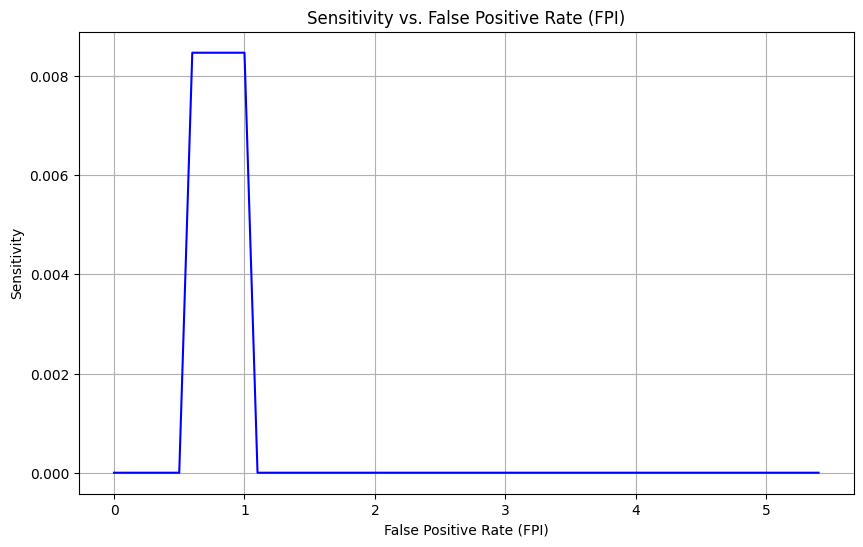

In [3]:
import matplotlib.pyplot as plt

# Data
FPI = [0.0, 0.1, 0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0, 1.1, 1.2, 1.5, 1.8, 1.9, 2.0, 2.4, 2.7, 3.0, 4.4, 5.4]
sensitivity = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00847, 0.00847, 0.00847, 0.00847, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(FPI, sensitivity, color='blue')
plt.title('Sensitivity vs. False Positive Rate (FPI)')
plt.xlabel('False Positive Rate (FPI)')
plt.ylabel('Sensitivity')
plt.grid(True)
plt.savefig('results/dtr/froc_curve')

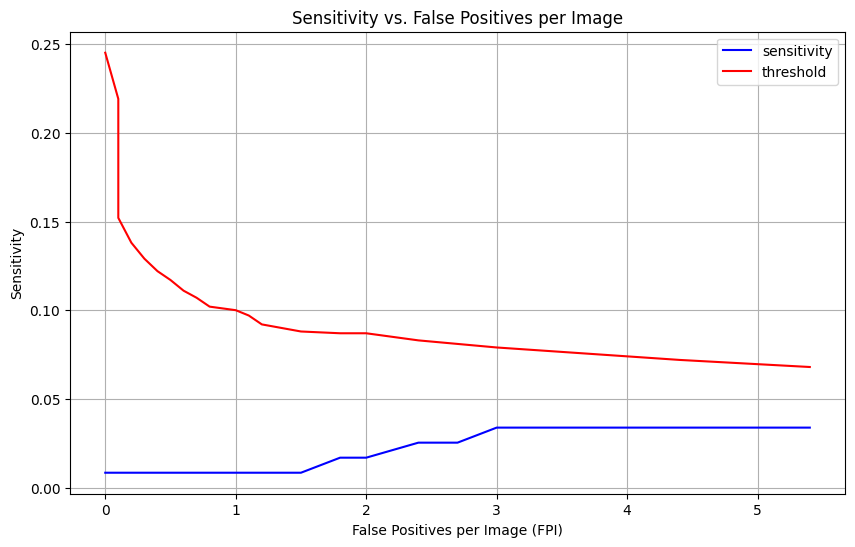

In [14]:
import matplotlib.pyplot as plt

# Data
fpi = [0.0, 0.1, 0.1, 0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0, 1.1, 1.2, 1.5, 1.8, 1.9, 2.0, 2.4, 2.7, 3.0, 4.4, 5.4]
sensitivity = [0.00847, 0.00847, 0.00847, 0.00847, 0.00847, 0.00847, 0.00847, 0.00847, 0.00847, 0.00847, 0.00847, 0.00847, 0.00847, 0.00847, 0.00847, 0.00847, 0.01695, 0.01695, 0.01695, 0.02542, 0.02542, 0.0339, 0.0339, 0.0339]
threshold = [0.24525, 0.21922, 0.18218, 0.16216, 0.15215, 0.13814, 0.12913, 0.12212, 0.11712, 0.11111, 0.10711, 0.1021, 0.1001, 0.0971, 0.09209, 0.08809, 0.08709, 0.08709, 0.08709, 0.08308, 0.08108, 0.07908, 0.07207, 0.06807]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(fpi, sensitivity, color='blue', label = 'sensitivity')
plt.plot(fpi, threshold, color='red', label = 'threshold')
plt.legend()
plt.xlabel('False Positives per Image (FPI)')
plt.ylabel('Sensitivity')
plt.title('Sensitivity vs. False Positives per Image')
plt.grid(True)
plt.savefig('results/dtr/froc_curve')
